<a href="https://colab.research.google.com/github/siqi-zheng/Hands-On-Genetic-Algorithms-with-Python/blob/master/Codes_for_survival_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uncomment first
!pip install lifelines
from lifelines import CoxPHFitter
from google.colab import files

import pandas as pd
import io
uploaded = files.upload()
# The above codes are for Google Colab Only. 


In [ ]:
# Random forest
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
! pip install scikit-survival
from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

In [ ]:
from lifelines import CoxTimeVaryingFitter
import pandas as pd
import matplotlib.pyplot as plt
# df2 = pd.read_csv(io.BytesIO(uploaded['cleaned_data.csv'])) # The dataset Xs should be saved as a csv from R

df2 = pd.read_csv('cleaned_data.csv')
base_df = df2[["event_time_dbl", "skill_level_know", "skill_level_priority", "skill_level_people", "skill_level_refusal", "skill_level_me", 
               "minigame_level", "old_skill_point", "new_skill_point", "animatic_time_elapsed",
               "avatar_age",	"avatar_gender",	"avatar_id",
               "event_new","player_id"]] # Select relevant variables


FileNotFoundError: ignored

In [ ]:
# Time Dependence (Can be ignored)
# for x in []:
#   print(x)
#   names = x + "_interaction"
#   print(names)
#   base_df[names] = base_df[x] * base_df['time'] # Create interaction terms
base_df[["event_time_start"]]=base_df[["event_time_dbl"]].groupby(base_df["player_id"]).shift(1, fill_value=0)
# Convert to categorical 
base_df[["avatar_age",	"avatar_id"]]=(base_df[["avatar_age",		"avatar_id"]]).astype("category")
base_df2 = base_df[["event_time_dbl", "skill_level_know", "skill_level_priority", "skill_level_people", "skill_level_refusal", "skill_level_me", 
               "minigame_level", "old_skill_point", "new_skill_point", "animatic_time_elapsed",
               "avatar_age",	"event_time_start",
               "event_new","player_id"]]
df = base_df2.sample(frac=0.2, random_state=1)
# dummies = pd.get_dummies(base_df2["avatar_gender"]).rename(columns=lambda x: 'Category_' + str(x))
# base_df2 = pd.concat([base_df2, dummies], axis=1)
# base_df2 = base_df2.drop(["avatar_gender"], inplace=True, axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Iteration 1: norm_delta = 1.44389, step_size = 0.9000, log_lik = -448538.09003, newton_decrement = 10946.40780, seconds_since_start = 2.4
Iteration 2: norm_delta = 1.07487, step_size = 0.9000, log_lik = -436571.69409, newton_decrement = 1943.03304, seconds_since_start = 4.0
Iteration 3: norm_delta = 0.30756, step_size = 0.9000, log_lik = -434465.30531, newton_decrement = 195.08079, seconds_since_start = 5.5
Iteration 4: norm_delta = 0.02458, step_size = 1.0000, log_lik = -434257.75919, newton_decrement = 2.57390, seconds_since_start = 7.1
Iteration 5: norm_delta = 0.00051, step_size = 1.0000, log_lik = -434255.15209, newton_decrement = 0.00109, seconds_since_start = 8.7
Iteration 6: norm_delta = 0.00000, step_size = 1.0000, log_lik = -434255.15101, newton_decrement = 0.00000, seconds_since_start = 10.3
Convergence success after 6 iterations.


/usr/local/lib/python3.7/dist-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  columns = summary_df.columns & self.columns
/usr/local/lib/python3.7/dist-packages/lifelines/utils/printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  columns = summary_df.columns & self.columns


<lifelines.CoxPHFitter: fitted with 76660 total observations, 32445 right-censored observations>
             duration col = 'event_time_dbl'
                event col = 'event_new'
      baseline estimation = breslow
   number of observations = 76660
number of events observed = 44215
   partial log-likelihood = -434255.151
         time fit was run = 2022-05-01 17:59:13 UTC

---
                        coef  exp(coef)   coef lower 95%   coef upper 95%       p
covariate                                                                        
skill_level_know       0.108      1.115            0.103            0.114 <0.0005
skill_level_priority  -0.132      0.876           -0.136           -0.129 <0.0005
skill_level_people    -0.007      0.993           -0.012           -0.002   0.011
skill_level_refusal    0.311      1.365            0.304            0.318 <0.0005
skill_level_me        -0.210      0.810           -0.218           -0.202 <0.0005
minigame_level         0.009      1.009            0.006            0.013 <0.0005
old_skill_point        0.071      1.073            0.059            0.083 <0.0005
new_skill_point       -0.041      0.959           -0.061           -0.022 <0.0005
animatic_time_elapsed  0.018      1.018            0.017            0.020 <0.0005
avatar_age             0.071      1.073            0.060            0.081 <0.0005
player_id             -0.000      1.000           -0.000           -0.000 <0.0005
---
Concordance = 0.689
Partial AIC = 868532.302
log-likelihood ratio test = 28565.878 on 11 df
-log2(p) of ll-ratio test = inf

Text(0.5, 1.0, 'log(Hazard Ratio) for all variables')

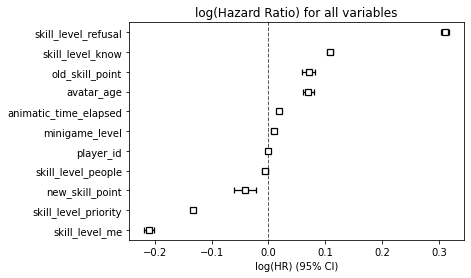

In [ ]:
inds = df[df["event_new"] == 1 ][df["event_time_start"]==df["event_time_dbl"]].index
df2 = df.drop(inds)
base_df3 = df[["event_time_dbl", "skill_level_know", "skill_level_priority", "skill_level_people", "skill_level_refusal", "skill_level_me", 
               "minigame_level", "old_skill_point", "new_skill_point", "animatic_time_elapsed",
               "avatar_age","event_new","player_id"]]
ctv = CoxPHFitter()
ctv.fit(base_df3, "event_time_dbl", "event_new", show_progress=True)
ctv.print_summary(decimals=3,columns=['coef','coef lower 95%', 'coef upper 95%', 'exp(coef)', 'p'])
ctv.plot()
plt.title('log(Hazard Ratio) for all variables')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Iteration 6: norm_delta = 0.00000, step_size = 1.00000, ll = -45691.21229, newton_decrement = 0.00000, seconds_since_start = 105.6Convergence completed after 6 iterations.


/usr/local/lib/python3.7/dist-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  columns = summary_df.columns & self.columns
/usr/local/lib/python3.7/dist-packages/lifelines/utils/printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  columns = summary_df.columns & self.columns


<lifelines.CoxTimeVaryingFitter: fitted with 59034 periods, 62 subjects, 26589 events>
         event col = 'event_new'
         penalizer = 0.1
number of subjects = 62
 number of periods = 59034
  number of events = 26589
partial log-likelihood = -45691.212
  time fit was run = 2022-05-01 17:12:49 UTC

---
                        coef  exp(coef)   coef lower 95%   coef upper 95%       p
covariate                                                                        
skill_level_know       0.037      1.038            0.034            0.040 <0.0005
skill_level_priority   0.036      1.036            0.033            0.039 <0.0005
skill_level_people     0.022      1.022            0.019            0.025 <0.0005
skill_level_refusal    0.049      1.050            0.046            0.052 <0.0005
skill_level_me         0.013      1.013            0.009            0.017 <0.0005
minigame_level         0.012      1.012            0.007            0.018 <0.0005
old_skill_point        0.212      1.236            0.196            0.228 <0.0005
new_skill_point        0.043      1.044            0.020            0.066 <0.0005
animatic_time_elapsed -0.024      0.976           -0.026           -0.022 <0.0005
avatar_age             0.178      1.194            0.165            0.190 <0.0005
---
Partial AIC = 91402.425
log-likelihood ratio test = 28339.912 on 10 df
-log2(p) of ll-ratio test = inf

Text(0.5, 1.0, 'log(Hazard Ratio) for all variables')

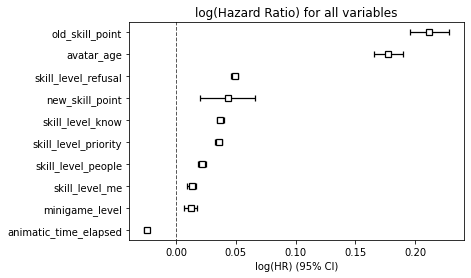

In [ ]:
inds = df[df["event_new"] == 1 ][df["event_time_start"]==df["event_time_dbl"]].index
df2 = df.drop(inds)
ctv = CoxTimeVaryingFitter(penalizer=0.1)
ctv.fit(df2, id_col="player_id", event_col="event_new", start_col="event_time_start", stop_col="event_time_dbl", show_progress=True)
ctv.print_summary(decimals=3,columns=['coef','coef lower 95%', 'coef upper 95%', 'exp(coef)', 'p'])
ctv.plot()
plt.title('log(Hazard Ratio) for all variables')

In [ ]:


df2[df2["event_new"] == 0 ][df2["event_time_start"]==df2["event_time_dbl"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,event_time_dbl,skill_level_know,skill_level_priority,skill_level_people,skill_level_refusal,skill_level_me,minigame_level,old_skill_point,new_skill_point,animatic_time_elapsed,avatar_age,event_time_start,event_new,player_id


In [ ]:
ctv.check_assumptions(base_df3, p_value_threshold=0.05, show_plots=True)
# Check (bad!) non-constant lines
# See here for possible improvements: https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html

In [ ]:
random_state = 20
df = df
X = df[["skill_level_know", "skill_level_priority", "skill_level_people", "skill_level_refusal", "skill_level_me", 
               "minigame_level", "old_skill_point", "new_skill_point", "animatic_time_elapsed",
               "avatar_age",	"event_time_start",
            "player_id"]]
y = df[["event_new","event_time_dbl"]]
y['event_new']=y['event_new'].astype('bool')


In [ ]:
y = y.to_records(index=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=random_state)

In [ ]:
rsf = RandomSurvivalForest(n_estimators=500,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state)
rsf.fit(X_train, y_train).oob_score_

In [ ]:
rsf.fit(X_test, y_test).oob_score_
# Higher the better

In [ ]:
# Visualization of predicted probability
X_test_sorted = X_test.sort_values(by=["avatar_age"])
X_test_sel = pd.concat((X_test_sorted.head(10), X_test_sorted.tail(10)))

surv = rsf.predict_survival_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.title("Predicted Survival Probability")
plt.legend()
plt.grid(True)

In [ ]:
# Variable Importance
! pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rsf, n_iter=15, random_state=random_state)
perm.fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X.columns.tolist())

In [ ]:
def recur(s,e):
  if s==e:
    return [s]
  else:
    arr = [s]
    arr += recur(s+1,e)
    return arr

recur(6,9)

[6, 7, 8, 9]

In [ ]:
import numpy as np

def calculate(list):
    newlist = np.array(list)
    try:
        num = np.reshape(newlist,(3,3)).T
    except ValueError:
        raise ValueError("List must contain nine numbers.")
    matrixlist = np.reshape(newlist,(3,3)).T
    print(matrixlist)
    print(matrixlist.mean(axis=1))
    cal = {}
    cal['mean']=[matrixlist.mean(axis=1).tolist(),matrixlist.mean(axis=0).tolist(),newlist.mean()]
    cal['variance']=[matrixlist.var(axis=1).tolist(),matrixlist.var(axis=0).tolist(),newlist.var()]
    cal['standard deviation']=[matrixlist.std(axis=1).tolist(),matrixlist.std(axis=0).tolist(),newlist.std()]
    cal['max']=[matrixlist.max(axis=1).tolist(),matrixlist.max(axis=0).tolist(),newlist.max()]
    cal['min']=[matrixlist.min(axis=1).tolist(),matrixlist.min(axis=0).tolist(),newlist.min()]
    cal['sum']=[matrixlist.sum(axis=1).tolist(),matrixlist.sum(axis=0).tolist(),newlist.sum()]
    return cal

arr1 = ([0,1,2,3,4,5,6,7,8])
calculate(arr1)=={
  'mean': [[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0],
  'variance': [[6.0, 6.0, 6.0], [0.6666666666666666, 0.6666666666666666, 0.6666666666666666], 6.666666666666667],
  'standard deviation': [[2.449489742783178, 2.449489742783178, 2.449489742783178], [0.816496580927726, 0.816496580927726, 0.816496580927726], 2.581988897471611],
  'max': [[6, 7, 8], [2, 5, 8], 8],
  'min': [[0, 1, 2], [0, 3, 6], 0],
  'sum': [[9, 12, 15], [3, 12, 21], 36]
}
calculate([1,2])

[[0 3 6]
 [1 4 7]
 [2 5 8]]
[3. 4. 5.]


ValueError: ignored

In [ ]:
np.array(arr1).var()
np.reshape(arr1,(3,3)).T.std(axis=1)

array([2.44948974, 2.44948974, 2.44948974])

In [ ]:
{
  'mean': [[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0],
  'variance': [[6.0, 6.0, 6.0], [0.6666666666666666, 0.6666666666666666, 0.6666666666666666], 6.666666666666667],
  'standard deviation': [[2.449489742783178, 2.449489742783178, 2.449489742783178], [0.816496580927726, 0.816496580927726, 0.816496580927726], 2.581988897471611],
  'max': [[6, 7, 8], [2, 5, 8], 8],
  'min': [[0, 1, 2], [0, 3, 6], 0],
  'sum': [[9, 12, 15], [3, 12, 21], 36]
}
{
  'mean': [axis1, axis2, flattened],
  'variance': [axis1, axis2, flattened],
  'standard deviation': [axis1, axis2, flattened],
  'max': [axis1, axis2, flattened],
  'min': [axis1, axis2, flattened],
  'sum': [axis1, axis2, flattened]
}